## Desafio Supera - Teste de *Bechdel*
                                                                  Desafiante : Herick Sampaio Muller 


    Os dados são referentes ao teste de "bechdel". Este teste averigua se uma obra de ficção possui ao menos duas mulheres que conversam entre si sobre algo que não seja um homem.Algumas vezes se adiciona a condição de que as duas mulheres tenham nomes. Muitas obras contemporâneas falham no teste, que é um indicativo de preconceito de gênero. Em média, filmes que passaram no teste possuíam orçamento mais baixo que outros, mas um desempenho financeiro melhor ou equivalente. 
   
    O teste recebe o nome em homenagem à cartunista norte-americana Alison Bechdel. Em 1985, uma personagem de seus quadrinhos Dykes to Watch Out For expressou a ideia, que a autora atribuiu a sua amiga Liz Wallace. O teste foi originalmente criado para avaliar filmes, mas é também aplicado para outras mídias. Também é conhecido como o teste de Bechdel/Wallace.
   Fonte: https://pt.wikipedia.org/wiki/Teste_de_Bechdel
   



##### Dicionário do teste : 
- year: Year	of	release;
- imdb: Text	to	construct	IMDB	url.	Ex:	http://www.imdb.com/title/tt1711425;
- title: Movie	test;
- binary: Bechdel	Test	PASS	vs	FAIL	binary;
- budget: Film	budget;
- domgross: Domestic	(US)	gross;
- intgross: Total	International	(i.e.,	worldwide)	gross;
- budget_2013: Budget	in	2013	inflation	adjusted	dollars;
- domgross_2013: Domestic	gross	(US)	in	2013	inflation	adjusted	dollars;
- intgross_2013: Total	International	(i.e.,	worldwide)	gross	in	2013	inflation adjusted	dollars.

Fonte: Supera - dicionário referente ao Desafio, 2021.

#### Carrengando bibliotecas para análise do estudo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print("Bibliotecas foram carregadas!")

Bibliotecas foram carregadas!


#### Importando dados
##### Variáveis:
- caminho: variavel contendo o caminho da importação dos dados;
- df = dataframe criado usando a variavel caminho;


In [2]:
path = r"C:\Users\Palad\OneDrive\Área de Trabalho\supera-data-test\bechdel.xlsx"
df = pd.read_excel(path)

print("Variaveis foram criadas!")

Variaveis foram criadas!


#### Análise explanatoria dos dados
##### Parte 1 - Objetivos:
- Verificar erros na leitura dos dados dos dados importados do excel;
- Procurar presença de NaN's no dataframe;
- Caso encontrado, tratar os dados com as métricas apropriadas (caso possível).

In [3]:
df.head(3)

,year,imdb,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,binary
0,1974,tt0071562,13000000,57300000.0,57300000.0,1974PASS,61408439,270669505.0,270669505.0,PASS
1,1982,tt0084516,10700000,74706019.0,121706019.0,1982PASS,25821968,180285645.0,293709241.0,PASS
2,2008,tt0800241,15000000,2203641.0,6379575.0,2008PASS,16233845,2384904.0,6904335.0,PASS


In [4]:
df.tail(3)

,year,imdb,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,binary
1497,2006,tt0493430,11000000,72778712.0,85278712.0,2006FAIL,12713760,84117369.0,98564824.0,FAIL
1498,2005,tt0352248,88000000,61649911.0,108539911.0,2005FAIL,104986915,73550386.0,129491710.0,FAIL
1499,1998,tt0122718,40000000,55143823.0,71743823.0,1998FAIL,57165293,78807819.0,102531416.0,FAIL


In [5]:
df.columns

Index(['year', 'imdb', 'budget', 'domgross', 'intgross', 'code', 'budget_2013',
       'domgross_2013', 'intgross_2013', 'binary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1500 non-null   int64  
 1   imdb           1500 non-null   object 
 2   budget         1500 non-null   int64  
 3   domgross       1485 non-null   float64
 4   intgross       1491 non-null   float64
 5   code           1500 non-null   object 
 6   budget_2013    1500 non-null   int64  
 7   domgross_2013  1484 non-null   float64
 8   intgross_2013  1491 non-null   float64
 9   binary         1500 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 117.3+ KB


In [7]:
percentualNulos = np.round((df.isnull().sum()/len(df))*100,2)
percentualNulos

year             0.00
imdb             0.00
budget           0.00
domgross         1.00
intgross         0.60
code             0.00
budget_2013      0.00
domgross_2013    1.07
intgross_2013    0.60
binary           0.00
dtype: float64

#### O que temos :
Nas colunas (chamadas de características/features) 'domgross','intgross','domgross_2013','intgross_2013' foram encontrados dados 'nulos'. As formas de tratamento sugeridas são:
1. Uso de dados de medida central;
2. Remoção dos dados nulos;
3. Aquisição dos dados faltantes e;
4. Optar por manter os dados nulos. 

Os tratamentos sugeridos dependem do 'tipo' do problema proposto, pois devem ser analisadas algumas características, como:

- As features podem ser ajustadas por dados de medidas centrais? 
R: 
Aplicável quando os valores possam estar enquadrados em algum padrão reconhecido. Ex: Uso da moda - numero de portas de um carro, leva-se em conta o modelo do carro, o ano de fabricação e o preço médio dos carros. Faz-se uso da 'moda' dos modelos de carro fabricados em  ano em comum e que estejam com valores selhantes. 
- Optar por manter dados Nulos? 
R:
Aplicável quando os dados possam ser usados como uma resposta para alguma pergunta do problema.

- Aquisicação dos dados faltantes? 
R:
Aplicável quando há esta possibilidade.

- Remover dados nulos?
R:
Aplicável quando os dados não possam ser ajustados pelas sugestões acima, leva-se em consideração o percentual de dados ausentes para esta solução.

###### Caminho proposto:
Para o desafio, optei por remover os dados ausentes pois eles não representam cerca de 01% dos dados gerais. A presença dos dados nulos podem acarretar erros na vizualização dos dados e em aplicaçãos de modelos de predição.

In [8]:
# Remoção dos dados nulos
df2 = df
df2.dropna(axis=0, inplace=True)

In [9]:
df2.isna().sum()

year             0
imdb             0
budget           0
domgross         0
intgross         0
code             0
budget_2013      0
domgross_2013    0
intgross_2013    0
binary           0
dtype: int64

Análises Estatisticas para o problema

In [11]:
print ('Correlaçao de Person:', df2.corr())
print('\n\n')
print ('Correlaçao de Spearman:', df2.corr('spearman'))

Correlaçao de Person:                    year    budget  domgross  intgross  budget_2013  \
year           1.000000  0.251715  0.010825  0.093296     0.078045   
budget         0.251715  1.000000  0.634855  0.708247     0.964863   
domgross       0.010825  0.634855  1.000000  0.940320     0.642014   
intgross       0.093296  0.708247  0.940320  1.000000     0.696533   
budget_2013    0.078045  0.964863  0.642014  0.696533     1.000000   
domgross_2013 -0.297862  0.392313  0.854521  0.748851     0.462779   
intgross_2013 -0.143916  0.549482  0.903216  0.911190     0.595499   

               domgross_2013  intgross_2013  
year               -0.297862      -0.143916  
budget              0.392313       0.549482  
domgross            0.854521       0.903216  
intgross            0.748851       0.911190  
budget_2013         0.462779       0.595499  
domgross_2013       1.000000       0.926564  
intgross_2013       0.926564       1.000000  



Correlaçao de Spearman:                    yea

In [46]:
df2.describe()

,year,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013
count,1484.000000,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03
mean,2002.595013,4.555538e+07,7.044093e+07,1.545368e+08,5.631130e+07,9.719035e+07,2.037077e+08
std,8.903832,4.887279e+07,8.201263e+07,2.165234e+08,5.586332e+07,1.293537e+08,2.921966e+08
min,1970.000000,7.000000e+03,8.280000e+02,8.280000e+02,8.632000e+03,8.990000e+02,8.990000e+02
25%,1998.000000,1.200000e+07,1.624430e+07,2.582818e+07,1.614374e+07,2.021705e+07,3.278405e+07
50%,2005.000000,2.900000e+07,4.270488e+07,7.874669e+07,3.699579e+07,5.607562e+07,9.933237e+07
75%,2009.000000,6.300000e+07,9.505252e+07,1.986160e+08,8.168407e+07,1.255309e+08,2.467075e+08
max,2013.000000,4.250000e+08,7.605076e+08,2.783919e+09,4.614359e+08,1.771683e+09,3.171931e+09


# Percentual de filmes que passaram/reprovaram no teste



In [36]:
# Percentual de filmes que passaram no teste
PassOrNot=np.round(df2['binary'].value_counts(normalize=True),2)*100
PassOrNot

FAIL    55.0
PASS    45.0
Name: binary, dtype: float64

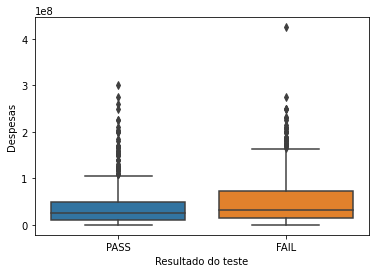

In [43]:
# Vizualicação dos dados 
sns.boxplot(data=df2,x='binary',y='budget')
plt.ylabel('Despesas')
plt.xlabel('Resultado do teste')

plt.show()


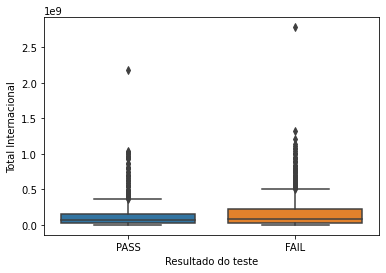

In [41]:
sns.boxplot(data=df2,x='binary',y='intgross')
plt.ylabel('Total Internacional')
plt.xlabel('Resultado do teste')

plt.show()

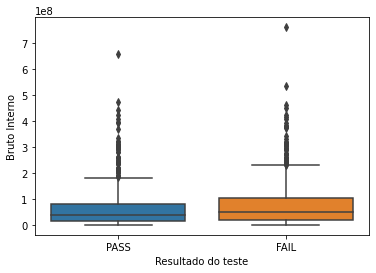

In [52]:
sns.boxplot(data=df2,x='binary',y='domgross')
plt.ylabel('Bruto Interno')
plt.xlabel('Resultado do teste')

plt.show()

Text(0, 0.5, 'Despesas')

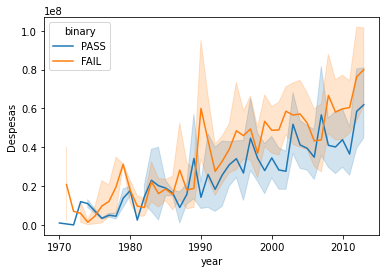

In [51]:
sns.lineplot(data=df2, x='year', y='budget', hue='binary')
plt.ylabel('Despesas')

#### Achados:

1. Cerca de 55% das obras falharam no teste de Bechdel;
2. A quantidade de despesas foi observada nas obras que falharam no teste;
3. A quantidade do bruto interno e do bruno internacional arrecadado foram maiores nas obras que falharam no teste.
4. Com o passar do tempo é possivel verificar que as obras  que falharam nos teste apresentam maiores despesas do que as que passaram.
5. A presença de outliers é um fator a ser discutido com o grupo analítico, pois ele pode ser um fator a ser análido. Aqui, as obras que estão dentro deste grupo estavam entre as maiores despesas ou arrecadamento de receita.

Interpretação:

 Com o passar do tempo é possivel verificar que os montantes de despesas ocorridas aumentaram nas obras que não continham as caracteristicas necessarias para passar no teste de Bechdel, contudo, a receita coletada era maior nas obras que falharam no teste.  Os motivos para a receita ter sido maior pode ser varias, desde fatores culturais de determinado Estado quanto a fatores de publicidade das obras.


In [ ]:
Preparo dos dados para 

In [53]:
mediana = PassOrNot.median()
mediana2 = df2['budget'].median()
mediana3 = df2['intgross'].median()

<AxesSubplot:>

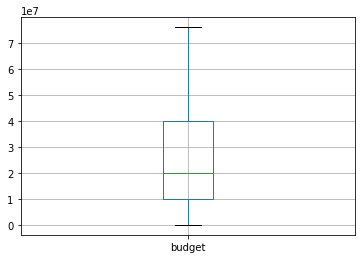

In [26]:
DistanciaInterQuartilica = df2['budget'].quantile(0.75) - df2['budget'].quantile(0.25)
DistanciaInterQuartilica2 = df2['budget'].quantile(0.75) - df2['budget'].quantile(0.25)
DistanciaInterQuartilica3 = df2['budget'].quantile(0.75) - df2['budget'].quantile(0.25)


DIQ = DistanciaInterQuartilica
DIQ2 = DistanciaInterQuartilica2
DIQ3 = DistanciaInterQuartilica3

limiteInf = mediana - (DIQ*1.5)
limiteSup = mediana +(DIQ*1.5)

limiteInf2 = mediana2 - (DIQ*1.5)
limiteSup2 = mediana2 +(DIQ*1.5)

limiteInf3 = mediana3 +(DIQ*1.5)
limiteSup3 = mediana3 +(DIQ*1.5)
# seletor 
seletor1 = df2[(df2['budget'] >=limiteInf) & (df2['budget'] <=limiteSup)]
seletor1.boxplot('budget')

Text(0, 0.5, 'Despesas')

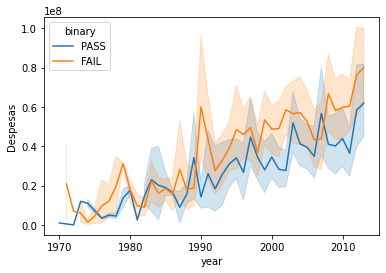

In [33]:
sns.lineplot(data=df2, x='year', y='budget', hue='binary')
plt.ylabel('Despesas')